In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud


In [3]:
linkedin_data = pd.read_csv("linkedin-reviews.csv")
linkedin_data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


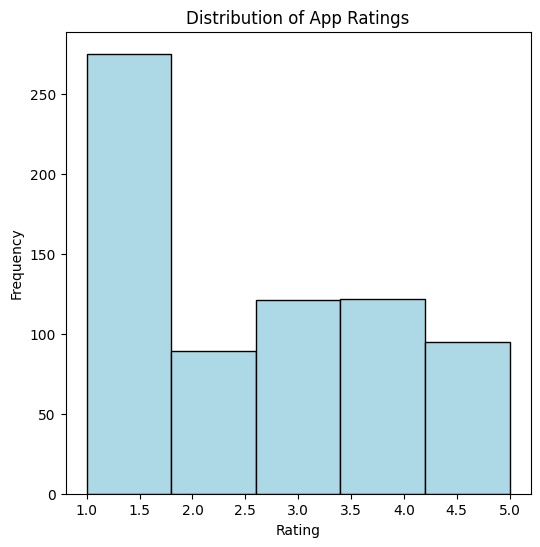

In [36]:
plt.figure(figsize=(6, 6))
plt.hist(linkedin_data['Rating'], bins=5, edgecolor='black',color='lightblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
_ = plt.ylabel('Frequency')

In [28]:
linkedin_data['Rating'].value_counts()

,count
Rating,
1,275
4,122
3,121
5,95
2,89


In [4]:
linkedin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
linkedin_data['Review Length'] = linkedin_data['Review'].apply(len)

In [18]:
import warnings
warnings.filterwarnings('ignore')

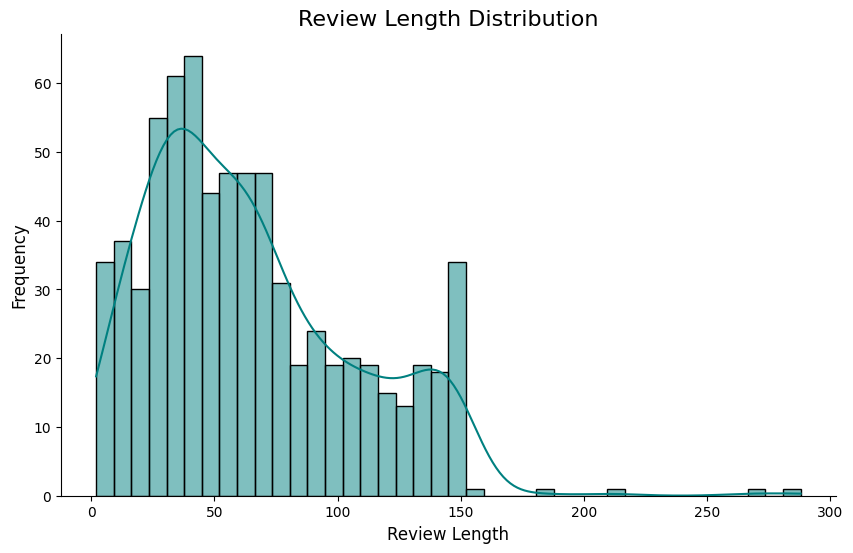

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(linkedin_data['Review Length'], bins=40, kde=True, color='teal')
plt.title('Review Length Distribution', fontsize=16)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()


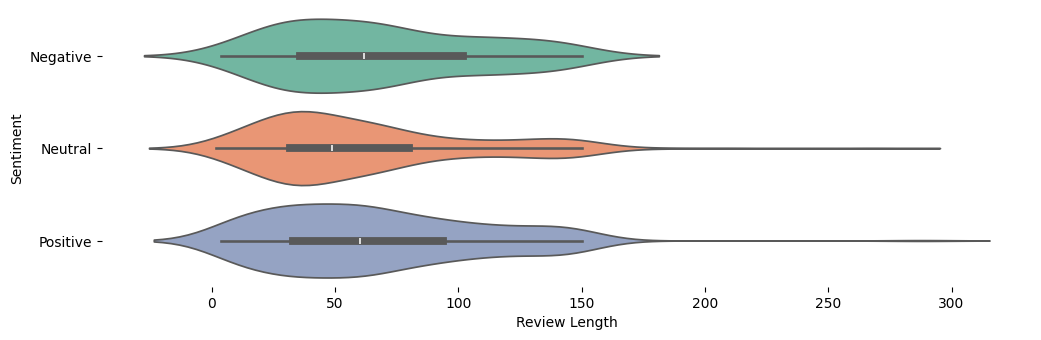

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(linkedin_data['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(linkedin_data, x='Review Length', y='Sentiment', inner='box', palette='Set2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

linkedin_data['Sentiment'] = linkedin_data['Review'].apply(textblob_sentiment_analysis)


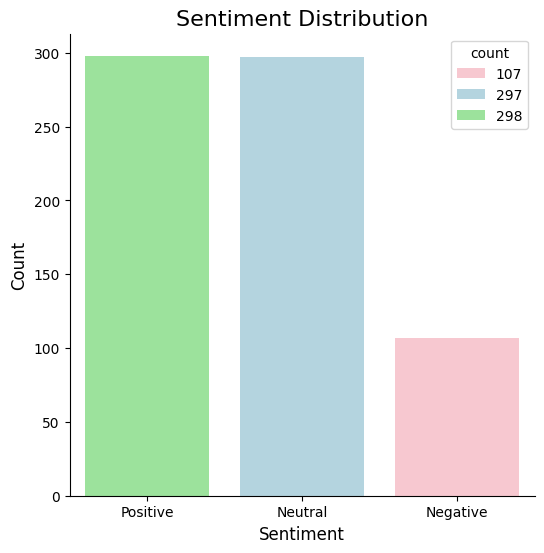

In [19]:
sentiment_distribution = linkedin_data['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, hue=sentiment_distribution,palette=['pink', 'lightblue', 'lightgreen'])
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.despine()
plt.show()


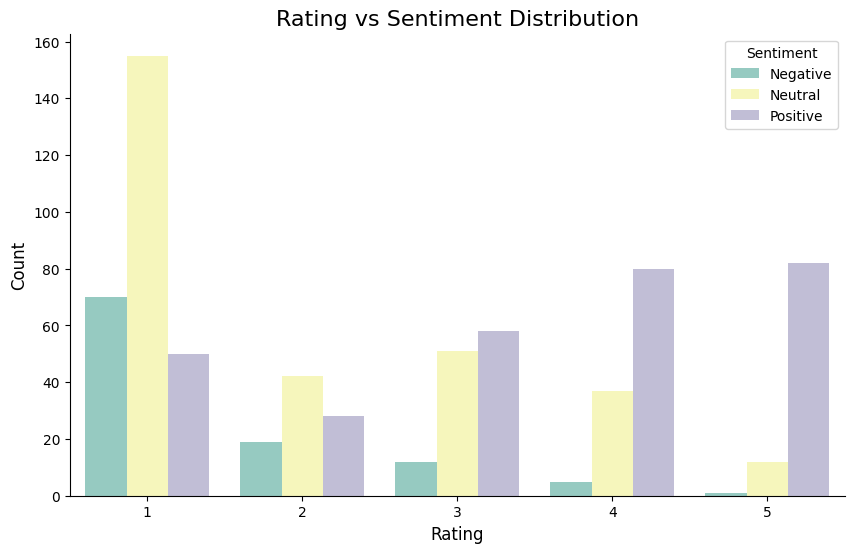

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=linkedin_data, x='Rating', hue='Sentiment', palette='Set3')
plt.title('Rating vs Sentiment Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', loc='upper right', fontsize=10)
sns.despine()
plt.show()


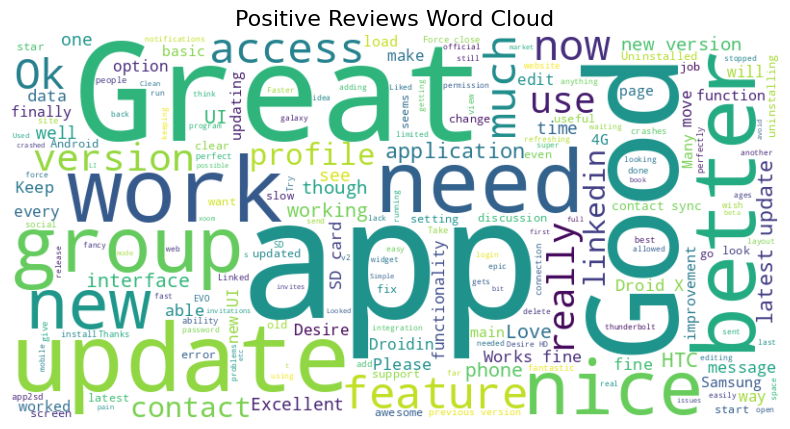

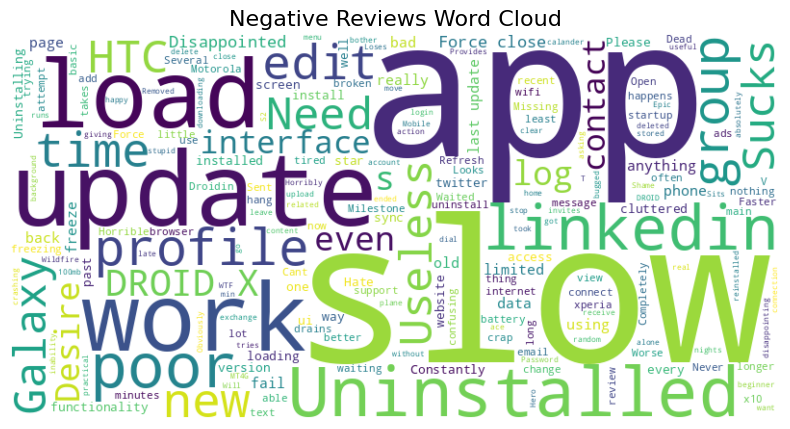

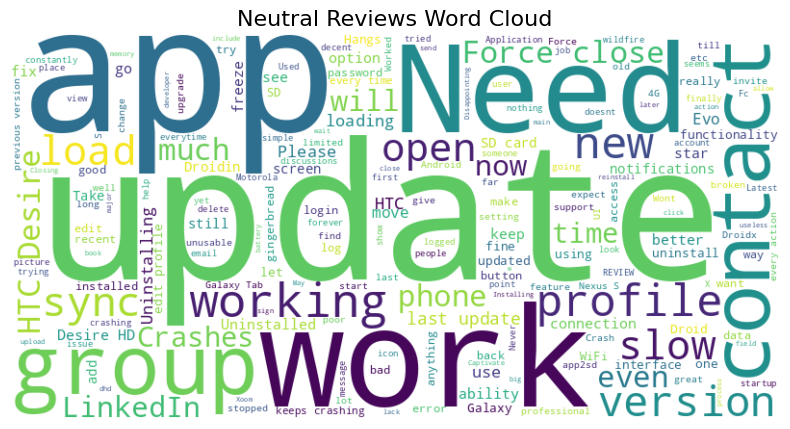

In [22]:
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_data[linkedin_data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment} Reviews Word Cloud', fontsize=16)
    plt.axis('off')
    plt.show()

for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)
